In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import ImarisLib

In [20]:
from cvbi.base_imaris.connection_helpers import get_all_objectIDs

get_all_objectIDs()

{0L: 'C:\\ProgramData\\Bitplane\\DataStorage\\CFAOVAD3 FNAF488 CD31 AF647 Th1 CMTMR_A01_G009_0001_7.ims',
 2L: 'C:\\ProgramData\\Bitplane\\DataStorage\\Data for protrusion analysis_3.ims'}

In [5]:
aImarisId = 2L
vImarisLib = ImarisLib.ImarisLib()
vImaris = vImarisLib.GetApplication(aImarisId)
vDataSet = vImaris.GetDataSet()

In [7]:
imaris_file = vImaris.GetCurrentFileName()
imaris_file.split('\\')[-1].split('.')[0]

'Data for protrusion analysis_3'

## Get Statistics

In [8]:
from cvbi.base_imaris.stats import GetSurpassObjects,get_imaris_statistics

In [23]:
objects = GetSurpassObjects(vImaris=vImaris,search='surfaces')

objects

{'Cell Surface V9': a6d58091-36b7-492a-b045-4113b61ca404 -t -e 1.0:tcp -h 172.19.244.153 -p 57535 -t 60000}

In [24]:
df = get_imaris_statistics(vImaris=vImaris, object_type='surfaces', object_name='Cell Surface V9')

In [25]:
df.head(2)

names,trackID,objectID,Acceleration,Acceleration X,Acceleration Y,Acceleration Z,Area,BoundingBoxAA Length X,BoundingBoxAA Length Y,BoundingBoxAA Length Z,...,Time Index,Time Since Track Start,Velocity Angle X,Velocity Angle Y,Velocity Angle Z,Velocity X,Velocity Y,Velocity Z,Volume,time
0,1000007814,7814,0.000000,0.000000,0.000000,0.0,380.147614,11.054688,12.160156,2.0,...,1.0,0.000000,126.873642,36.870987,90.002655,-0.000783,0.001045,0.0,169.959457,1.0
1,1000007814,7815,0.000036,-0.000013,-0.000033,0.0,382.282623,10.652344,12.558594,2.0,...,2.0,59.834999,171.124390,81.121735,90.002655,-0.001117,0.000174,0.0,177.417694,2.0


In [26]:
df.trackID.unique()

array(['1000007814', '1000007825', '1000007829', '1000007917',
       '1000007940'], dtype=object)

## Get Surface voxel Coordinates

In [27]:
selected = objects['Cell Surface V9']

In [88]:
selected_surface_data.GetExtendMinX(),selected_surface_data.GetExtendMaxX()

(55402.76171875, 55413.81640625)

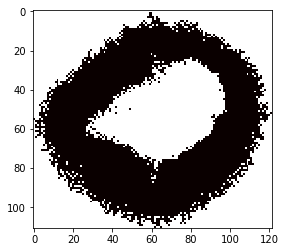

In [86]:
selected_surface_data = selected.GetSurfaceData(0)
a = selected_surface_data.GetDataVolumeFloats(aIndexC=0,aIndexT=0)
a = np.array(a)


plt.imshow(a[...,1]>32700, cmap='hot');

In [36]:
len(selected.GetIds()),len(selected.GetTrackIds())

(82, 77)

In [ ]:
selected.GetSurfaceData()